In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Retriving the csv file from the internal storage

In [92]:
df = pd.read_csv('archive/predictive_maintenance.csv')

In [93]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Showing the heatmap for better understanding 

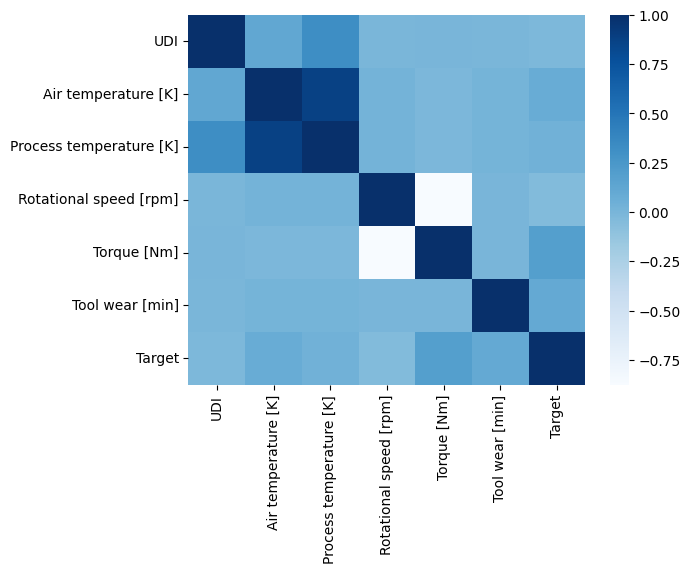

In [95]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

Checking if the file contains any null values or not

In [96]:
null_values = df.isnull().sum()

In [97]:
null_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

For showing the column names and unique values on each table: 

In [98]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print("Number of unique values in column '{}': {}".format(column, unique_values_count))

Number of unique values in column 'UDI': 10000
Number of unique values in column 'Product ID': 10000
Number of unique values in column 'Type': 3
Number of unique values in column 'Air temperature [K]': 93
Number of unique values in column 'Process temperature [K]': 82
Number of unique values in column 'Rotational speed [rpm]': 941
Number of unique values in column 'Torque [Nm]': 577
Number of unique values in column 'Tool wear [min]': 246
Number of unique values in column 'Target': 2
Number of unique values in column 'Failure Type': 6


For showing the failure types in Failure Type column

In [99]:
failure_type_counts = df['Failure Type'].value_counts()

print("Unique failure types and their counts:")
print(failure_type_counts)

Unique failure types and their counts:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


Plot the Failures in heatmap: 

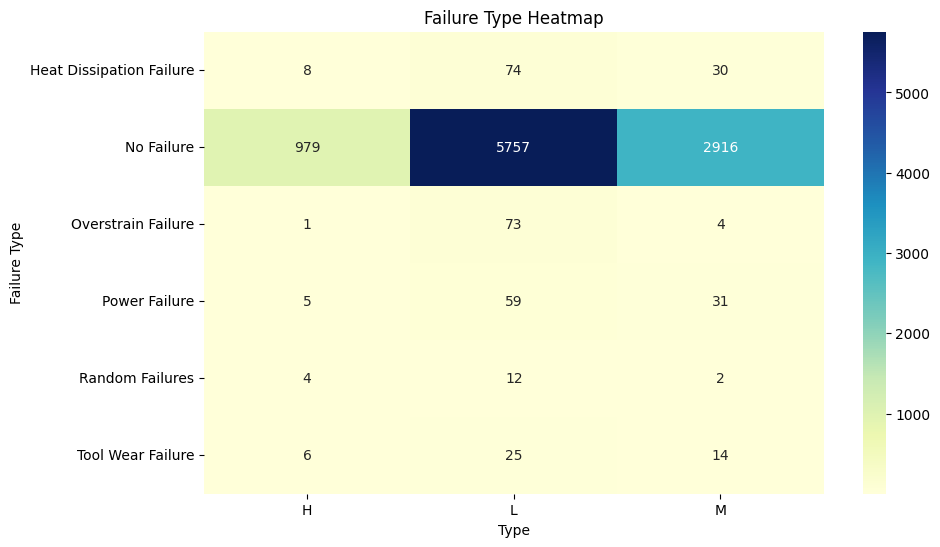

In [100]:
pivot_table = df.pivot_table(index='Failure Type', columns='Type', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Failure Type Heatmap')
plt.xlabel('Type')
plt.ylabel('Failure Type')
plt.show()

In [101]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Drop the unused columns: 

In [102]:
df.rename(columns={'Air temperature [K]': 'Air_temperature','Process temperature [K]': 'Process_temperature','Rotational speed [rpm]': 'Rotational_speed'}, inplace=True)

In [103]:
df.rename(columns={'Torque [Nm]': 'Torque','Tool wear [min]': 'Tool_wear'}, inplace=True)

In [104]:
df

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [105]:

columns_to_drop = ['UDI','Product ID','Target']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [106]:
df

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


<Axes: xlabel='Failure Type', ylabel='count'>

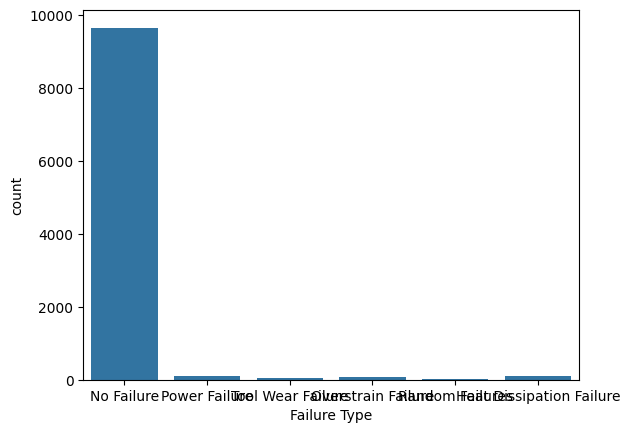

In [107]:
sns.countplot(x='Failure Type',data= df)

In [108]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


Convert the Type column into 3 Binary tables: 

In [109]:
Type_binary = pd.get_dummies(df['Type']).astype("int")

Concat with the main file

In [110]:
df= pd.concat([df,Type_binary],axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air_temperature      10000 non-null  float64
 2   Process_temperature  10000 non-null  float64
 3   Rotational_speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool_wear            10000 non-null  int64  
 6   Failure Type         10000 non-null  object 
 7   H                    10000 non-null  int32  
 8   L                    10000 non-null  int32  
 9   M                    10000 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(2)
memory usage: 664.2+ KB


Then Drop the Type column from the file: 

In [112]:
df=df.drop(columns=['Type'])

Label Encoding for Failure Type column: 

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Create a dictionary to map categories to numerical values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the category mapping
print(category_mapping)

{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


For Understanding the data values: 

In [114]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure Type,H,L,M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,1.039000,0.100300,0.600000,0.299700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.379069,0.300415,0.489922,0.458149
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,1.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,1.000000,0.000000,1.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000,0.000000,1.000000,1.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,5.000000,1.000000,1.000000,1.000000


For split the data for training and testing

In [115]:
from sklearn.model_selection import train_test_split


X = df.drop('Failure Type', axis=1)
y = df['Failure Type']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [116]:
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)
#     print('Scaler saved to scaler.pkl')

In [117]:
X_test.sample(20)

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M
5245,303.6,313.0,1575,38.3,54,0,1,0
9055,297.3,308.4,1864,23.1,90,1,0,0
412,297.5,308.6,1388,48.2,203,0,1,0
4272,302.5,310.8,1577,36.9,158,0,1,0
871,295.8,306.4,1339,53.2,67,0,1,0
537,297.4,309.3,1516,43.0,83,1,0,0
3342,301.5,310.8,1382,52.4,165,0,1,0
6485,300.6,309.8,1629,37.6,162,0,1,0
2992,300.5,309.7,1685,29.4,140,0,0,1
6462,300.6,310.0,1483,44.0,97,1,0,0


In [118]:
y_train.sample(20)

7000    1
8596    1
4492    1
2855    1
4922    1
8471    1
506     1
5818    1
3646    1
5745    1
2996    1
7433    1
7722    1
5096    1
1621    1
2294    1
4259    1
8837    1
7030    1
1127    1
Name: Failure Type, dtype: int32

In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 2694 to 235
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air_temperature      8000 non-null   float64
 1   Process_temperature  8000 non-null   float64
 2   Rotational_speed     8000 non-null   int64  
 3   Torque               8000 non-null   float64
 4   Tool_wear            8000 non-null   int64  
 5   H                    8000 non-null   int32  
 6   L                    8000 non-null   int32  
 7   M                    8000 non-null   int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 468.8 KB


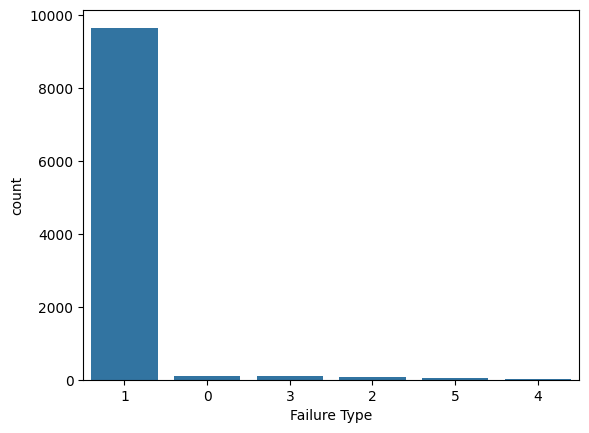

In [120]:
sns.countplot(x='Failure Type', data=df, order=y_train.value_counts().index)
plt.show()

Showing the heatmap again for the second time to understand the data better.

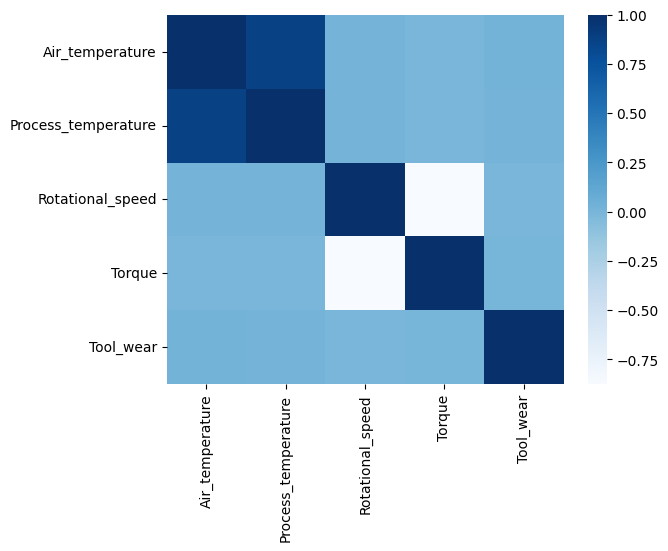

In [121]:
numeric_data = X_train.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

Data_resampling using smote sampling

In [122]:
y_train.value_counts()

Failure Type
1    7719
0      93
3      73
2      64
5      38
4      13
Name: count, dtype: int64

In [123]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [124]:
type(y_train_resampled)

pandas.core.series.Series

For value counts in Y_train_resampled column: 

In [125]:
y_train_resampled.value_counts()

Failure Type
1    7719
3    7719
2    7719
0    7719
5    7719
4    7719
Name: count, dtype: int64

In [126]:
y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 46314 entries, 0 to 46313
Series name: Failure Type
Non-Null Count  Dtype
--------------  -----
46314 non-null  int32
dtypes: int32(1)
memory usage: 181.0 KB


In [127]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([7719, 7719, 7719, 7719, 7719, 7719], dtype=int64))

Showing the Y_train_resampled in a plot

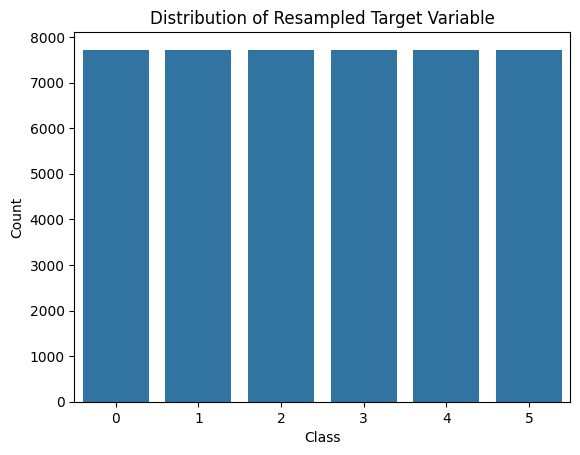

In [128]:

sns.countplot(x=y_train_resampled)
plt.title('Distribution of Resampled Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



Data fitting for model training with random forest classifier: 

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [130]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
   
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')  
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    return y_pred

In [131]:
logiistic_model = LogisticRegression()
LR_y_pred=evaluate_model(logiistic_model, X_train_resampled, y_train_resampled, X_test, y_test)
LR_y_pred

Model: LogisticRegression
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.74      0.10        19
           1       1.00      0.57      0.72      1933
           2       0.26      0.93      0.41        14
           3       0.29      0.95      0.45        22
           4       0.00      0.40      0.01         5
           5       0.03      0.43      0.06         7

    accuracy                           0.58      2000
   macro avg       0.27      0.67      0.29      2000
weighted avg       0.97      0.58      0.71      2000



c:\Users\BS-Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 4, ..., 4, 1, 4])

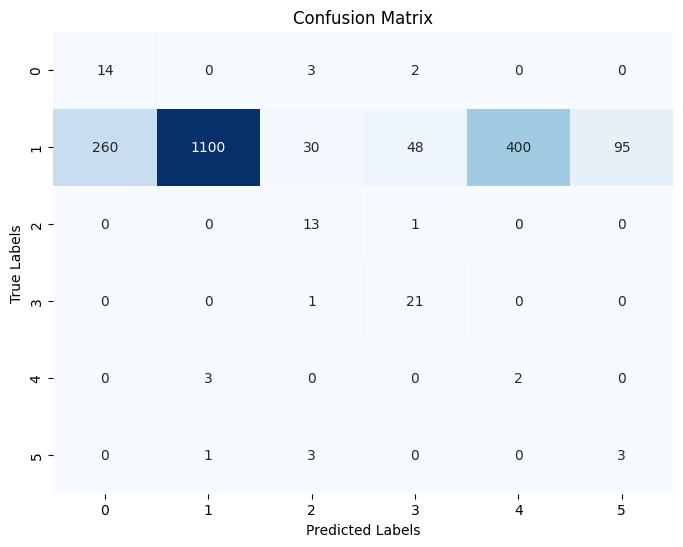

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LR_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [133]:
Random_model = RandomForestClassifier()
R_forest_y_pred=evaluate_model(Random_model, X_train_resampled, y_train_resampled, X_test, y_test)
R_forest_y_pred

Model: RandomForestClassifier
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.99      0.98      0.99      1933
           2       0.58      0.79      0.67        14
           3       0.81      0.95      0.88        22
           4       0.00      0.00      0.00         5
           5       0.13      0.29      0.18         7

    accuracy                           0.97      2000
   macro avg       0.55      0.64      0.58      2000
weighted avg       0.98      0.97      0.98      2000



array([1, 1, 1, ..., 1, 1, 1])

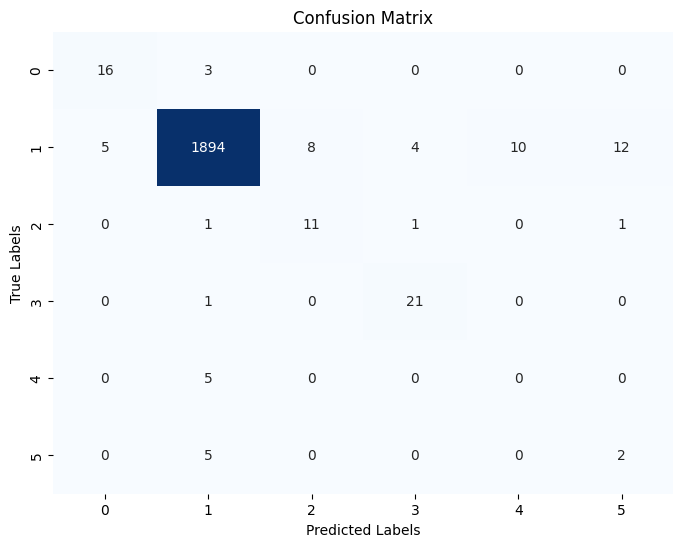

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, R_forest_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [135]:
knn_model = KNeighborsClassifier()
Knn_y_pred=evaluate_model(knn_model, X_train_resampled, y_train_resampled, X_test, y_test)
Knn_y_pred

Model: KNeighborsClassifier
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.53      0.15        19
           1       0.99      0.74      0.85      1933
           2       0.33      0.64      0.44        14
           3       0.33      0.86      0.48        22
           4       0.00      0.20      0.01         5
           5       0.06      0.71      0.12         7

    accuracy                           0.74      2000
   macro avg       0.30      0.61      0.34      2000
weighted avg       0.97      0.74      0.83      2000



array([1, 1, 4, ..., 1, 1, 4])

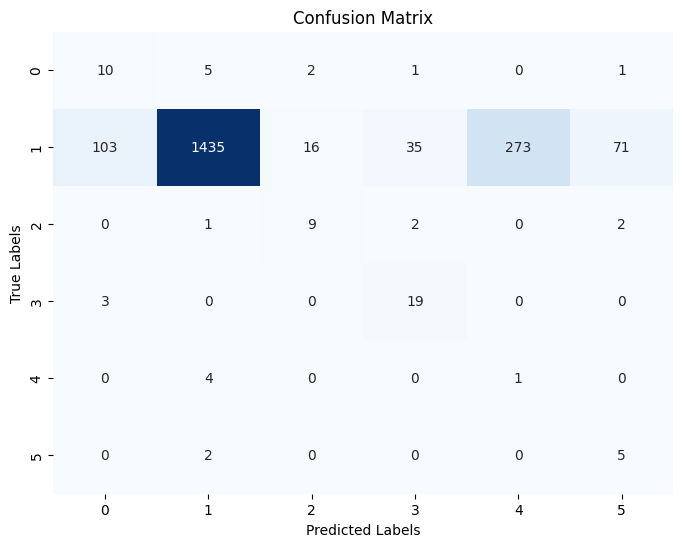

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, Knn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [137]:
Decision_tree_model = DecisionTreeClassifier()
Decision_y_pred=evaluate_model(Decision_tree_model, X_train_resampled, y_train_resampled, X_test, y_test)
Decision_y_pred

Model: DecisionTreeClassifier
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.99      0.97      0.98      1933
           2       0.67      0.71      0.69        14
           3       0.77      0.77      0.77        22
           4       0.03      0.20      0.06         5
           5       0.09      0.29      0.13         7

    accuracy                           0.96      2000
   macro avg       0.55      0.63      0.57      2000
weighted avg       0.98      0.96      0.97      2000



array([1, 1, 1, ..., 1, 1, 1])

In [138]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_Y_pred=evaluate_model(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
xgb_Y_pred

Model: XGBClassifier
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.99      0.98      0.99      1933
           2       0.81      0.93      0.87        14
           3       0.84      0.95      0.89        22
           4       0.00      0.00      0.00         5
           5       0.12      0.29      0.17         7

    accuracy                           0.98      2000
   macro avg       0.63      0.68      0.65      2000
weighted avg       0.99      0.98      0.98      2000



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [139]:
import pickle


In [140]:
model_path = 'Final_model.pkl'  # Specify a path and filename


In [141]:
# Assuming `model` is your trained model instance
with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f'Model saved at {model_path}')


Model saved at Final_model.pkl


In [142]:


# Load the model from the file
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)
print(f'Model loaded from {model_path}')


Model loaded from Final_model.pkl


In [143]:
[X_test.loc[2941]]

[Air_temperature         300.7
 Process_temperature     309.6
 Rotational_speed       1996.0
 Torque                   19.8
 Tool_wear               203.0
 H                         0.0
 L                         0.0
 M                         1.0
 Name: 2941, dtype: float64]

In [144]:
xgb_model.predict([X_test.loc[1167]]).item()

2

In [145]:
loaded_model.predict([X_test.loc[1167]]).item()

2

In [146]:
X_test

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M
9953,298.1,307.8,1565,35.3,119,0,1,0
3850,302.3,311.0,1421,41.3,182,0,0,1
4962,304.0,312.7,1456,51.2,160,0,0,1
3886,302.4,311.3,1392,50.5,51,0,1,0
5437,302.9,312.6,1394,46.4,82,0,0,1
...,...,...,...,...,...,...,...,...
3919,302.5,311.5,1655,32.3,142,1,0,0
162,298.3,308.1,1586,35.5,0,0,1,0
7903,300.8,312.3,1435,44.8,134,0,1,0
2242,299.2,308.4,1667,29.0,199,0,1,0


In [147]:
X_test[X_test.index.isin(y_test[y_test == 2].index)]

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M
9014,297.2,308.1,1340,61.3,207,0,0,1
7759,300.4,311.8,1272,59.2,198,0,1,0
6159,301.0,311.0,1399,58.0,190,0,1,0
9653,299.0,309.9,1373,55.7,201,0,1,0
1167,297.0,308.1,1362,52.5,213,0,1,0
6673,301.6,310.7,1380,51.8,216,0,1,0
1583,298.2,308.4,1310,61.0,189,0,1,0
1085,297.0,307.8,1385,56.4,202,0,1,0
8608,297.4,308.4,1369,50.6,220,0,1,0
7593,300.5,311.2,1270,67.5,208,0,1,0


In [148]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46314 entries, 0 to 46313
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air_temperature      46314 non-null  float64
 1   Process_temperature  46314 non-null  float64
 2   Rotational_speed     46314 non-null  int64  
 3   Torque               46314 non-null  float64
 4   Tool_wear            46314 non-null  int64  
 5   H                    46314 non-null  int32  
 6   L                    46314 non-null  int32  
 7   M                    46314 non-null  int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 2.3 MB
